### RFM 분석
#### 사용자별로 얼마나 최근에, 얼마나 자주, 얼마나 많은 금액을 지출했는지에 따라 사용자들의 분포를 확인하거나 사용자 그룹(또는 등급)을 나누어 분류하는 분석 기법이다. 구매 가능성이 높은 고객을 선정할 때 용이한 데이터 분석방법이며, 사용자들의 평소 구매 패턴을 기준으로 분류를 진행하기 때문에 각 사용자 그룹의 특성에 따라 차별화된 마케팅 메시지를 전달할 수 있다.
- Recency : 얼마나 최근에 구매했는가
- Frequency : 얼마나 자주 구매했는가
- Monetary : 얼마나 많은 금액을 지출했는가

### 고객 분석
- InvoiceNo: 
- StockCode: 
- Description:  
- Quantity: 
- InvoiceDate:
- UnitPrice: 
- CustomerID:
- Country:

In [1]:
import pandas as pd

Superstore_df = pd.read_csv('./datasets/Sample - Superstore.csv', encoding='cp1252')
Superstore_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [2]:
Superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

### 결측치 검사
📌 결측치: 값이 없는 것, Null 또는 NA로 표현.

In [3]:
Superstore_df.isna().sum().sum()

0

### 중복행 검사

In [4]:
Superstore_df.duplicated().sum()

0

### 데이터 전처리
> 데이터 유형을 변환하거나 데이터 분석에 용이한 형태로 변환하는 작업을 통해,  
불필요한 컬럼 삭제, 열 병합 등을 통해 데이터를 정제하는 처리방식
- Order Date 오늘 날짜로부터 몇 일 차이인지로 변환 후 최근 구매 척도인 Recency로 변환
- UnitPrice와 Quantity을 곱하여 전체 금액을 구한 뒤 지출 금액의 척도인 Monetary로 변환
- CustomerID별 구매 횟수를 구매 빈도의 척도인 Frequency로 변환
- 시각화를 통해 발생하는 이상치를 대표값으로 대체

In [5]:
Superstore_df['Recency'] = pd.to_datetime(Superstore_df['Order Date']).apply(lambda x: (pd.to_datetime('2023-10-07') - x).days)
Superstore_df = Superstore_df.drop(['Order Date'], axis=1)
Superstore_df

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Recency
0,1,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2524
1,2,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2524
2,3,CA-2016-138688,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2673
3,4,US-2015-108966,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2918
4,5,US-2015-108966,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,3546
9990,9991,CA-2017-121258,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2414
9991,9992,CA-2017-121258,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2414
9992,9993,CA-2017-121258,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2414


In [6]:
Superstore_df = Superstore_df.groupby('Customer ID') \
.agg({'Customer ID': 'count', 'Recency': 'min', 'Sales': 'sum'}) \
.rename(columns={'Customer ID': 'Frequency', 'Sales': 'Monetary'})


Superstore_df

,Frequency,Recency,Monetary
Customer ID,,,
AA-10315,11,2291,5563.560
AA-10375,15,2126,1056.390
AA-10480,12,2366,1790.512
AA-10645,18,2162,5086.935
AB-10015,6,2522,886.156
...,...,...,...
XP-21865,28,2150,2374.658
YC-21895,8,2111,5454.350
YS-21880,12,2116,6720.444


In [10]:
Superstore_df['Monetary'] = Superstore_df['Monetary'].astype('int32')
Superstore_df = Superstore_df.reset_index()
Superstore_df

,Customer ID,Frequency,Recency,Monetary
0,AA-10315,11,2291,5563
1,AA-10375,15,2126,1056
2,AA-10480,12,2366,1790
3,AA-10645,18,2162,5086
4,AB-10015,6,2522,886
...,...,...,...,...
788,XP-21865,28,2150,2374
789,YC-21895,8,2111,5454
790,YS-21880,12,2116,6720
791,ZC-21910,31,2161,8025


### 정규화(Normalization)
값의 범위를 0~1사이로 변환시켜 모든 컬럼의 데이터가 평등하게 만들어준다.  
서로 다른 단위의 값은 비교대상이 될 수 없다. 예를 들어, 80kg과 180cm는 비교할 수 없기에 정규화를 사용하여 비교한다.

In [11]:
from sklearn.preprocessing import MinMaxScaler

normalization = MinMaxScaler()
rfm_normalization = normalization.fit_transform(Superstore_df[['Recency', 'Frequency', 'Monetary']])
rfm_normalization = pd.DataFrame(rfm_normalization, columns=['Recency', 'Frequency', 'Monetary'])

Superstore_df[['Frequency', 'Recency', 'Monetary']] = rfm_normalization[['Frequency', 'Recency', 'Monetary']]
Superstore_df

,Customer ID,Frequency,Recency,Monetary
0,AA-10315,0.277778,0.157940,0.222014
1,AA-10375,0.388889,0.016309,0.042014
2,AA-10480,0.305556,0.222318,0.071329
3,AA-10645,0.472222,0.047210,0.202963
4,AB-10015,0.138889,0.356223,0.035225
...,...,...,...,...
788,XP-21865,0.750000,0.036910,0.094652
789,YC-21895,0.194444,0.003433,0.217660
790,YS-21880,0.305556,0.007725,0.268222
791,ZC-21910,0.833333,0.046352,0.320340


### 데이터 마이닝
- 대규모로 저장된 데이터안에서 체계적이고 자동적으로 통계적 규칙이나 짜임 또는 패턴을 분석하여, 가치있는 정보를 빼내는 과정이다.

### 클러스터 분석(Cluster analysis)
- 주어진 데이터들의 특성을 고려해 데이터 집단을 정의하고 데이터 집단을 대표할 수 있는 대표점을 찾는 것으로 데이터 마이닝의 한 방법이다.
- 클러스터란 비슷한 특성을 가진 데이터들의 집단이고 데이터의 성격에 따라 여러 클러스터(집단)으로 나뉠 수 있다.
- 머신러닝을 사용하여 분석할 수 있으며, 분리할 클러스터 개수를 알려줘야 한다.  
이 때, KElbowVisualizer를 사용해서 최적의 클러스터 개수(elbow)를 먼저 알아낼 수 있다.

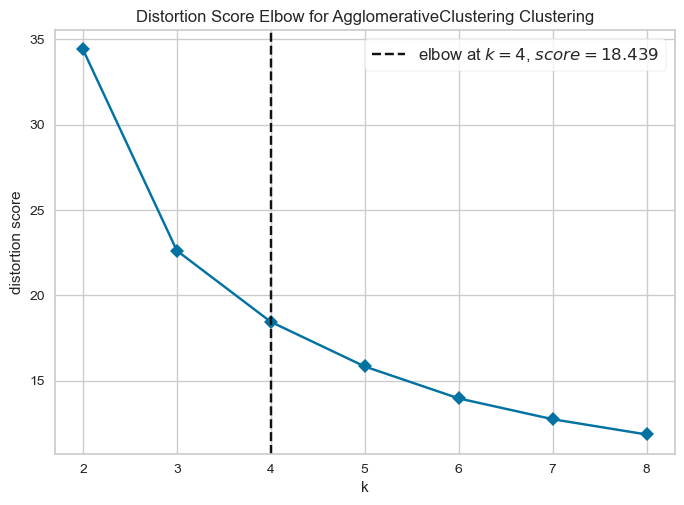

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering()

# k_elbow_visualizer = KElbowVisualizer(model, k=(3, 9), timings=True)
k_elbow_visualizer = KElbowVisualizer(model, k=(2, 9), timings=False)
k_elbow_visualizer.fit(rfm_normalization)

k_elbow_visualizer.show()

In [16]:
agglomerative_clustering = AgglomerativeClustering(n_clusters=4).fit(rfm_normalization)
Superstore_df.loc[:, 'cluster'] = agglomerative_clustering.labels_
Superstore_df.loc[:, 'cluster'].value_counts()

cluster
2    340
1    241
0    132
3     80
Name: count, dtype: int64

In [18]:
Superstore_df

,Customer ID,Frequency,Recency,Monetary,cluster
0,AA-10315,0.277778,0.157940,0.222014,1
1,AA-10375,0.388889,0.016309,0.042014,1
2,AA-10480,0.305556,0.222318,0.071329,2
3,AA-10645,0.472222,0.047210,0.202963,1
4,AB-10015,0.138889,0.356223,0.035225,0
...,...,...,...,...,...
788,XP-21865,0.750000,0.036910,0.094652,3
789,YC-21895,0.194444,0.003433,0.217660,1
790,YS-21880,0.305556,0.007725,0.268222,1
791,ZC-21910,0.833333,0.046352,0.320340,3


### 시각화
- matplotlib를 사용하여 데이터를 시각화할 수 있고 이를 통해 한 눈에 볼 수 없는 많은 데이터를 한 눈에 볼 수 있다.
- 데이터 분석에 대한 전문 지식이 없는 일반인도 이해할 수 있다.
- 동일한 통계를 가지고 있더라도, 시각화 시 변화나 패턴이 다를 수 있다.

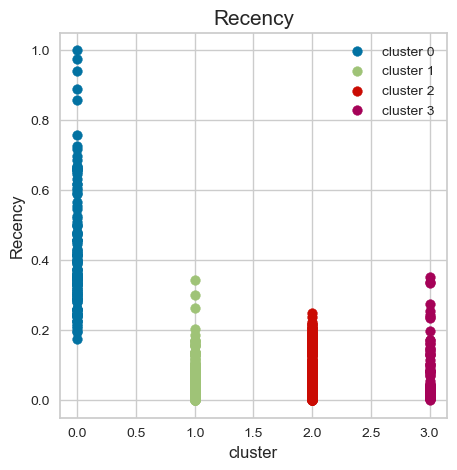

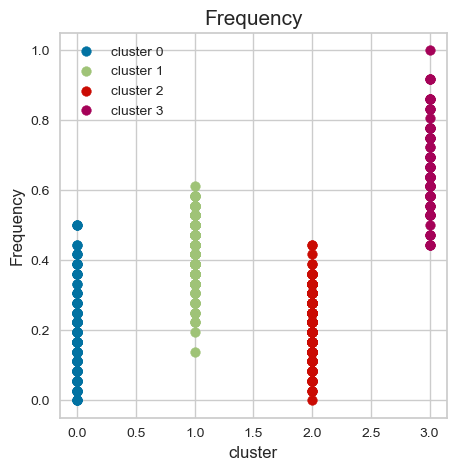

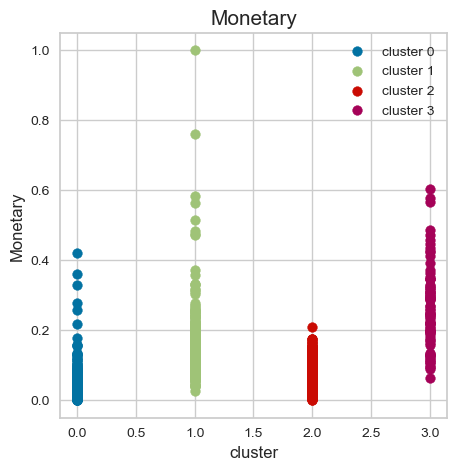

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recency : 얼마나 최근에 구매했는가
# Frequency : 얼마나 자주 구매했는가
# Monetary : 얼마나 많은 금액을 지출했는가
titles = ['Recency', 'Frequency', 'Monetary']

# 클러스터(집단) 개수
k = 4

# 각 항목별
for title in titles:
    plt.figure(figsize=(5, 5))
    
    # 집단 별
    for i in range(k):
#     scatter: 산점도(분포도)
        plt.scatter(Superstore_df.loc[Superstore_df['cluster'] == i, 'cluster'], 
                    Superstore_df.loc[Superstore_df['cluster'] == i, title], 
                    label=f'cluster {i}')

#     색상별 제목(label) 표시
    plt.legend()
    plt.title(title, size=15)
    plt.xlabel('cluster', size=12)
    plt.ylabel(title, size=12)
    plt.show()   

### boxplot
- 데이터의 분포와 이상치를 한 번에 볼 수 있으며, 서로 다른 집단을 쉽게 비교할 수 있는 차트이다.
<div style="display: flex">
    <img src="./images/boxplot2.png" width="400" style="margin-left: 20px">
    <img src="./images/boxplot1.png" width="400" style="margin-left: 20px">
<div>

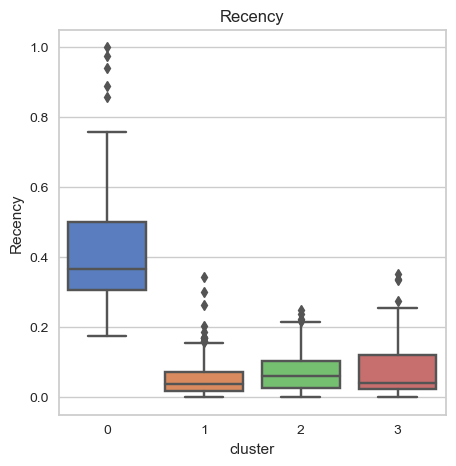

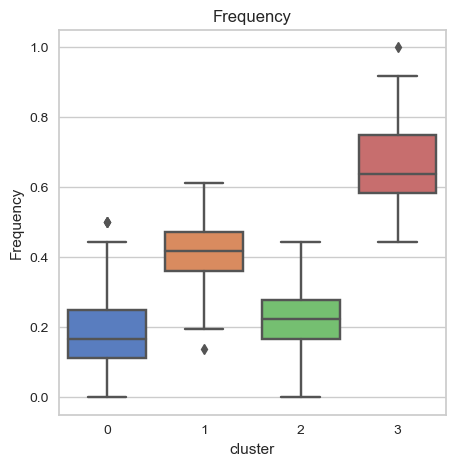

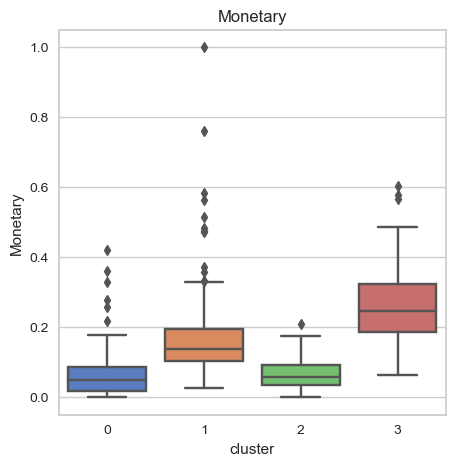

In [20]:
titles = ['Recency', 'Frequency', 'Monetary']

for title in titles:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=Superstore_df.cluster, y=Superstore_df[title], palette='muted')
    plt.title(title)
    plt.show()

- R, F, M 점수는 1~4로 계산함.
- Cluster1과 2는 동점이기 때문에 최근 구매(R)의 중요 여부에 따라 고객 등급을 매길 수 있다.
- 여기서는 최근 구매를 더 중요하다고 가정한다.
> Cluster0: Bronze, (4, 1, 1) = 6  
Cluster1: Silver, (1, 3, 3) = 7  
Cluster2: Gold, (3, 2, 2) = 7  
Cluster3: VIP, (2, 4, 4) = 10  

In [21]:
Superstore_df['cluster'] = Superstore_df['cluster'].replace([0, 1, 2, 3], ['Bronze', 'Silver', 'Gold', 'VIP'])
Superstore_df

,Customer ID,Frequency,Recency,Monetary,cluster
0,AA-10315,0.277778,0.157940,0.222014,Silver
1,AA-10375,0.388889,0.016309,0.042014,Silver
2,AA-10480,0.305556,0.222318,0.071329,Gold
3,AA-10645,0.472222,0.047210,0.202963,Silver
4,AB-10015,0.138889,0.356223,0.035225,Bronze
...,...,...,...,...,...
788,XP-21865,0.750000,0.036910,0.094652,VIP
789,YC-21895,0.194444,0.003433,0.217660,Silver
790,YS-21880,0.305556,0.007725,0.268222,Silver
791,ZC-21910,0.833333,0.046352,0.320340,VIP


Cluster Count:
cluster
Gold      340
Silver    241
Bronze    132
VIP        80
Name: count, dtype: int64


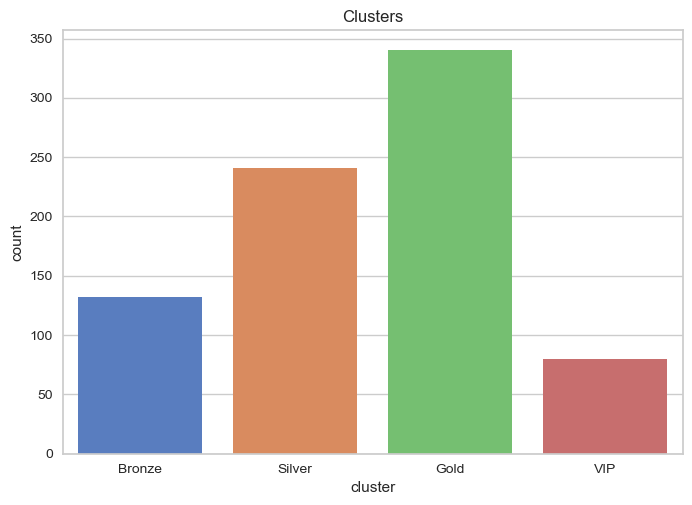

In [22]:
order = ['Bronze', 'Silver', 'Gold', 'VIP']
# create a countplot
print('Cluster Count:')
print(Superstore_df['cluster'].value_counts())

sns.countplot(x='cluster', data=Superstore_df, palette='muted', order=order)
plt.title('Clusters')
plt.show()